
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>



# Übung 5 
# Regression, Overfitting, Regularisierung, Hyper-Parameter-Optimierung

In dieser Übung werden wir ein Regressionsmodell trainieren und
den Zusammenhang zwischen Hyper-Parameter-Optimierung, Generalisierung und Overfitting kennenlernen.

Ihr solltet folgende Pakete installiert haben, um das Notebook laufen zu lassen
* `numpy`
* `matplotlib`
* `sklearn`
* `pandas`

**Löst die Programmieraufgaben und die Fragen**

## Abgabe 

Das Jupyter-Notebook und einen HTML- oder PDF-Export in Moodle hochladen.


## Teil 1 - Regression, Overfitting, Regularisierung

Führt das Notebook Schritt für Schritt aus und ergänzt den fehlenden Code

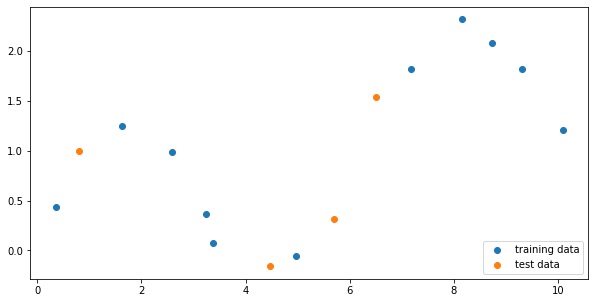

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import utils
%matplotlib inline
    
X_train, X_test, y_train, y_test = utils.generateData()
X_train = X_train[:,None]
X_test = X_test[:,None]

utils.plot_data_scatter(X_train, y_train, X_test, y_test)

## Aufgabe 1

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
    
Ergänzt die Funktion `aufgabe1_train_polynomial_regression(degree, X_train, y_train)`, die eine polynomiales Regressionsmodell auf den *Trainigsdaten* `X_train` für verschiedene Grade `1, 3, 6, 9` trainiert. 

Verwendet:
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) aus sklearn.preprocessing um polynomiale Attribute zu erstellen und
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) aus sklearn.linear_model, um eine lineare Regression auf den polynomialen Attributen zu trainieren 

</div> 

Das Ergebnis sollte so aussehen:
<img src="polynomialreg.png" style="width: 600px;"/>

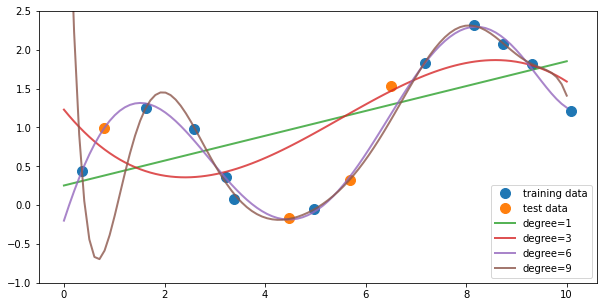

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def aufgabe1_train_polynomial_regression(degree, X_train, y_train) :    

    #### EURE LÖSUNG HIER #####
    ## a) erstellt einen Transformator für PolynomialFeatures des Grads 'degree'
    ## b) trainiert eine LineareRegression auf polynomialen-Attributen        
    ## c) gebt beide Estimators (poly_transformer, linreg)  zurück
    poly_transformer = PolynomialFeatures(degree)
    X_poly = poly_transformer.fit_transform(X_train)
    linreg = LinearRegression().fit(X_train, y_train)
    linreg.fit(X_poly, y_train)
    
    return poly_transformer, linreg



###### Hier nichts ändern ######
# Trainiert verschiedene Polynome
def train():
    result = np.zeros((4,100))    
    for i, deg in enumerate([1,3,6,9]): # verschiedene Grade
        poly, linreg = aufgabe1_train_polynomial_regression(deg, X_train, y_train)    
        for j, p in enumerate(np.linspace(0,10,100)):
            if poly is not None:
                p_poly = poly.transform([[p]])
            if linreg is not None:
                result[i,j] = linreg.predict(p_poly)
    return result


utils.plot_one(X_train, y_train, X_test, y_test, train())
###### Hier nichts ändern ######

<hr>

## Aufgabe 2

<div class="alert alert-success alertsuccess" style="margin-top: 20px">


Schreibt nun eine Funktion `aufgabe2_score_mse(poly_transformer, linreg, X, y)`, die Vorhersagen mittels eures in Aufgabe 1 gelernten polynomialen Regressions-Modells erstellt und den Mean-Squared-Error (MSE) berechnet.

Verwendet dafür:
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) aus sklearn.metrics um den Mean-Squared-Error zu berechen.

</div>
    
Als Ergebnis wird der Fehler aus den Trainigsdaten und Testdaten geplotet:
<img src="validation_curve.png" style="width: 500px;"/>

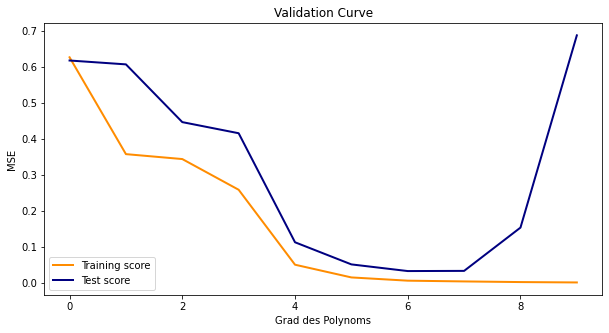

In [13]:
from sklearn.metrics import mean_squared_error

def aufgabe2_score_mse(poly_transformer, linreg, X, y):    

    #### EURE LÖSUNG HIER #####
    ## Macht Vorhersagen mit eurem gelernten Modell 'linreg' für X
    ## - dafür müssen zuerst die polynomischen Features erstellt werden mittels 'poly_tranfsormer'
    ## - anschließend eine Vorhersage erstellt werden mittels 'linreg'
    ## - zuletzt der MSE berechnet werden auf diesen Vorhersagen mittels mean_squared_error
    ## - gebt nur den MSE zurück
    p_poly = poly_transformer.transform(X)
    y_pred = linreg.predict(p_poly)
    mse = mean_squared_error(y, y_pred)
    
    return mse;
    
    
###### Hier nichts ändern ######        
def generate_data():
    mse_train = np.zeros(10)
    mse_test = np.zeros(10)
    
    for i, deg in enumerate(range(len(mse_train))):
        poly, linreg = aufgabe1_train_polynomial_regression(deg, X_train, y_train)
        mse_train[i] = aufgabe2_score_mse(poly, linreg, X_train, y_train)
        mse_test[i] = aufgabe2_score_mse(poly, linreg, X_test, y_test)
        
    return mse_train, mse_test

mse_train, mse_test = generate_data()
utils.plot_validation_curve(mse_train, mse_test)
###### Hier nichts ändern ######

## Aufgabe 3

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

Basierend auf dem Ergebnis der vorherigen Aufgabe 2 und der Abbildung:

Bei welchem Polynom-Grad aus [0,...,9]
- underfittet,
- overfittet,
- generalisiert
das gelernte Regressions-Modell?
    
</div>

In [ ]:
underfit: [0, 1, 2, 3, 4]
overfit: [8, 9],
generalized: [5, 6, 7]


## Aufgabe 4

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

Modelle mit hohem Graden neigen dazu zu *overfitten*. Daher verwenden wir eine regularisierte Variante der Linearen Regression, d.h. `RidgeRegression` oder `LassoRegression`.

In dieser Aufgabe trainiert eine (regularisierte) Lasso-Regression auf den polynomischen Attributen des Grads `degree`.

Verwendet für die Lasso-Regression die Parameter:
- `alpha=0.01`: Multiplikator für Regularisierung
- `max_iter=10000`: Anzahl der Iterationen
- `Normalize=True`

Gebt eure gelernten Modelle zurück.

</div>

Als Ergebnis wird der Fehler der Lasso-Regression auf den Trainigsdaten und Testdaten geplotet:
<img src="lasso.png" style="width: 500px;"/>

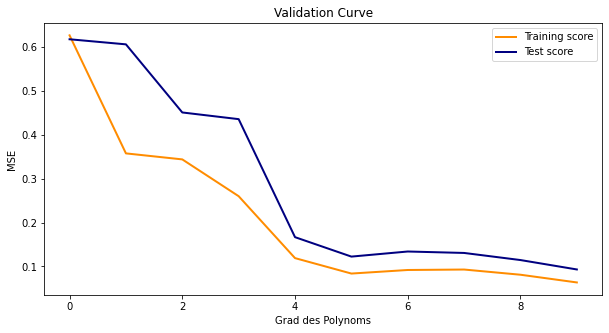

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

alpha = 0.01
max_iter = 10000
normalize = False

def aufgabe4_train_lasso_regression(degree, alpha, max_iter, normalize, X, y):
    #### EURE LÖSUNG HIER ##### 
    ## a) erstellt einen Transformator für PolynomialFeatures des Grads 'degree'
    ## b) trainiert eine Lasso-Regression auf polynomialen-Attributen
    ## c) gebt beide Estimators (poly_transformer, lassoreg)  zurück
    
    poly_transformer = PolynomialFeatures(degree)
    X_poly = poly_transformer.fit_transform(X)
    lassoreg = Lasso(alpha=alpha, max_iter=max_iter, normalize=normalize)
    lassoreg.fit(X_poly, y)
    
    return poly_transformer, lassoreg



###### Hier nichts ändern ######    
def generate_data():
    mse_train = np.zeros(10)
    mse_test = np.zeros(10)
    for i, deg in enumerate(range(len(mse_test))):
        poly, linlasso = aufgabe4_train_lasso_regression(deg, alpha, max_iter, normalize, X_train, y_train)
        mse_train[i] = aufgabe2_score_mse(poly, linlasso, X_train, y_train)
        mse_test[i] = aufgabe2_score_mse(poly, linlasso, X_test, y_test)
    return mse_train, mse_test

mse_train, mse_test = generate_data()
utils.plot_validation_curve(mse_train, mse_test)
###### Hier nichts ändern ######    

## Aufgabe 5

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

Basierend auf dem Ergebnis der vorherigen Aufgabe 4:

Bei welchem Polynom-Grad aus [0,...,9]
- underfittet,
- overfittet,
- generalisiert
das gelernte Lasso-Modell?
    
</div>

In [ ]:
underfit: [0, 1, 2, 3, 4]
generalized: [5, 6, 7, 8, 9]

<hr>

# Teil 2: Vorhersage von Haus-Preisen in Bosten

Der vorhandene Datensatz enthält 506 Häuser in Boston aus dem Jahr 1993. Es gibt 13 numerische Attribute

Ziel ist es, das bestmögliche Regressionsmodell zu lernen, um den Preis (Attribut MEDV) eines Haus vorherzusagen

In [16]:
# Load the training and test data
h_train = pd.read_csv('housing_train.csv', sep=';')
h_test = pd.read_csv('housing_test.csv', sep=';')
h_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [17]:
# teilen nach Test und Trainingsdaten
X_train = h_train.iloc[:,0:-1]
y_train = h_train['MEDV']

X_test = h_test.iloc[:,0:-1]
y_test = h_test['MEDV']

## Hyper-Parameter-Optimierung mit GridSearch:

Zum Optimieren von Hyper-Parameter verwenden wir beim überwachten Lernen [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV).

Grid-Search testet für die übergeben Parameter die Genauigkeit des Modells mittels Cross-Validation und wählt den Hyper-Parameter, der den kleinsten Fehler liefert. Als Fehlermaß nehmen wir bei der Regression: `scoring='neg_mean_squared_error'`, also minimieren den MSE.

Der [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) hat unter anderem den Hyper-Parameter `n_neighbors`. 

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_neighbors': range(1,10, 1)},
 ]

knn_reg = KNeighborsRegressor()
grid = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("KNN Score:", grid.score(X_test, y_test))
print("Bestes Modell:", grid.best_params_)
print("MSE des Modells:", -1*grid.best_score_)
print("Test-MSE des Modells:", mean_squared_error(y_test, grid.predict(X_test)))

KNN Score: -33.04589210526316
Bestes Modell: {'n_neighbors': 5}
MSE des Modells: 71.12075956539236
Test-MSE des Modells: 33.04589210526316


Das beste Modell liegt also bei k=`n_neighbors=5`. 

Zum Vergleich plotten wir nun die Validation-Curve mit den Trainigs-Daten, Test-Daten und dem Cross-Validation-Score. Mit k=5 liegen wir nahe am Optimum von k=8 auf den Testdaten.

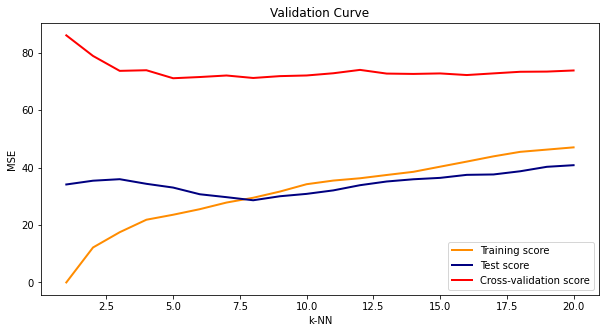

In [19]:
from sklearn.model_selection import cross_val_score

k_max = 20
def generate_data():
    mse_train = np.zeros(k_max)
    mse_test = np.zeros(k_max)
    mse_cross = np.zeros(k_max)
        
    for i, k in enumerate(range(1,k_max+1,1)):
        mse_cross[i] = -1*cross_val_score(
            KNeighborsRegressor(n_neighbors=k), X_train, y_train, scoring='neg_mean_squared_error').mean()

        knn_reg = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)        
        mse_train[i] = mean_squared_error(y_train, knn_reg.predict(X_train))
        mse_test[i] = mean_squared_error(y_test, knn_reg.predict(X_test))
    return mse_train, mse_test, mse_cross

def plot_validation_curve():
    plt.figure(figsize=(10,5))        
    plt.title('Validation Curve')
    plt.xlabel('k-NN')
    plt.ylabel('MSE')
    param_range = range(1, k_max+1, 1)
    mse_train, mse_test, mse_cross = generate_data()
    plt.plot(param_range, mse_train, label='Training score', color='darkorange', lw=2)
    plt.plot(param_range, mse_test, label='Test score', color='navy', lw=2)    
    plt.plot(param_range, mse_cross, label='Cross-validation score', color='red', lw=2)    
    plt.legend(loc='best')
    plt.show()
    
plot_validation_curve()

## Aufgabe 6 

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

Erstellt nun selbst eines der Modelle, das ihr aus der Vorlesung kennt, mittels GridSearchCV auf Trainigsdaten:

**Regression Modelle:**
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Mit oder ohne:
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures)

Verwendet **make_pipeline** oder **Pipeline** um Transformer (wie PolynomialFeatures) mit einem der Estimator (wie Ridge) zu verbinden:
   
- [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline): Explizit Namen `scaler`, `svc` angeben

```   
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
``` 

- [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html?highlight=make%20pipeline#sklearn.pipeline.make_pipeline): Namen werden implizit generiert: `standardscaler`
    
```
pipe = make_pipeline(StandardScaler(), GaussianNB(priors=None))
```
    
Verwendet **GridSearchCV**, um die Hyper-Parameter eures Modells zu optimieren:
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV)

**Aufgabe:**
- Trainiert eines der oben genannten Modelle mittels GridSearchCV. Denkt an die Parametrisierung von Grid-Search mittels `scoring='neg_mean_squared_error'`
- Gebt euren MSE auf den Testdaten aus

</div>

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#### EURE LÖSUNG HIER ##### 
# - Trainiert eines der oben genannten Modelle mittels GridSearchCV(... scoring='neg_mean_squared_error')
pipe = Pipeline([('poly_transform', PolynomialFeatures()), ('linreg', LinearRegression())])
param_grid = {
    'poly_transform__degree': [1, 3, 6, 9],
}
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Bestes Modell:", grid_search.best_params_)
# - Gebt den MSE auf den Testdaten aus
print("Test-MSE des Modells:", mean_squared_error(y_test, grid.predict(X_test)))


Bestes Modell: {'poly_transform__degree': 1}
Test-MSE des Modells: 33.04589210526316
